In [33]:
import torch
import cv2
import onnxruntime as ort 
import numpy as np
import matplotlib.pyplot as plt

session = ort.InferenceSession("./Models/depth_anything_v2_vits.onnx")

type(session)

onnxruntime.capi.onnxruntime_inference_collection.InferenceSession

In [34]:
def get_depth(imagename: str, extension: str = ".png", session: ort.capi.onnxruntime_inference_collection.InferenceSession = None):
    image = cv2.imread("./Images/" + imagename + extension)  # H, W, C
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255.0
    image = cv2.resize(image, (518,518), interpolation=cv2.INTER_CUBIC)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = (image-mean)/std
    image = np.transpose(image, (2,0,1)) # C, H, W
    input_image = np.expand_dims(np.array(image), axis=0).astype(np.float32)
    depth = session.run(None, {"l_x_": input_image})[0]
    depth = np.reshape(depth, (518,518))
    return depth

In [40]:
images = ['indoor1', 'indoor2']
depths = [get_depth(x, session=session) for x in images]

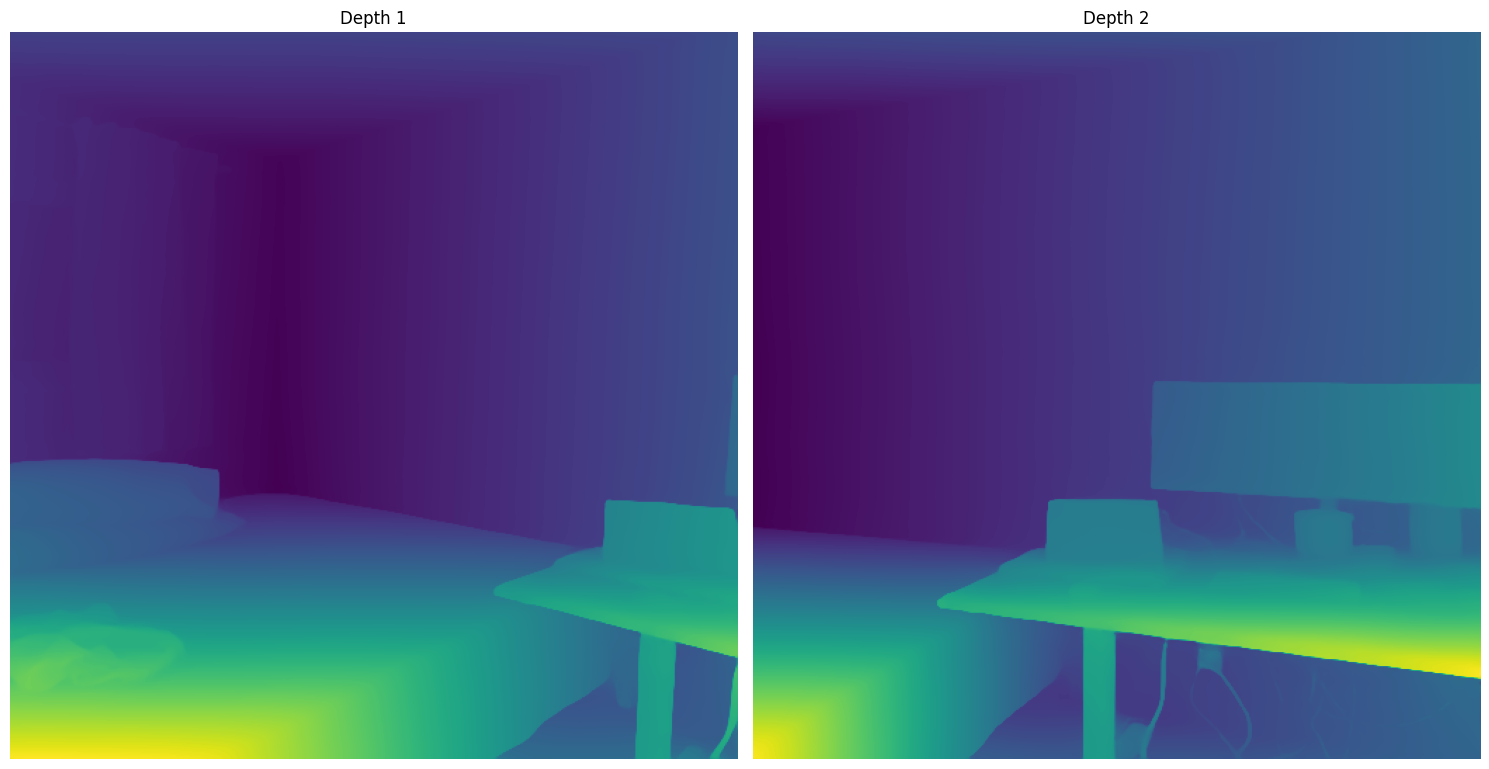

In [41]:
num_images = len(depths)
cols = int(np.ceil(np.sqrt(num_images)))
rows = int(np.ceil(num_images / cols))
plt.figure(figsize=(15, 10))

for i, depth in enumerate(depths, 1):
    plt.subplot(rows, cols, i)
    plt.imshow(depth)
    plt.title(f'Depth {i}')
    plt.axis('off')  

plt.tight_layout()
plt.show()